In [32]:
### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [33]:
### LOADING THE CREDITS DATASET
credits = pd.read_csv("tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
### LOADING THE MOVIES DATASET
movies_df = pd.read_csv("tmdb_5000_movies.csv")
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


### EXPLORATORY DATA ANALYSIS

In [35]:
### SHAPE OF THE DATA
print("Credits:", credits.shape)
print("Movies Dataframe:", movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [36]:
### COLUMN RENAMING AND DATAFRAME MERGING
credits_column_renamed = credits.rename(index = str, columns = {"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on = "id")
movies_df_merge.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [37]:
### DATA CLEANING
movies_cleaned_df = movies_df_merge.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'production_countries'])
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [38]:
### CLEANED DATA INFORMATION
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

#### 1. RECOMMENDATION BASED ON WEIGHTED AVERAGE METHOD

In [39]:
### COMPUTING ALL THE COMPONENTS BASED ON THE WEIGHTED AVERAGE FOR EACH MOVIES AVERAGE RATING (W = R*v + C*m/v + m)
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = movies_cleaned_df['vote_average'].mean()
m = movies_cleaned_df['vote_count'].quantile(0.70) ## count of movies which are more than 70% quantile


In [40]:
movies_cleaned_df['weighted_average'] = ((R*v) + (C*m))/(v+m)
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276075


In [41]:
movies_sorted_ranking = movies_cleaned_df.sort_values('weighted_average', ascending = False)
movies_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


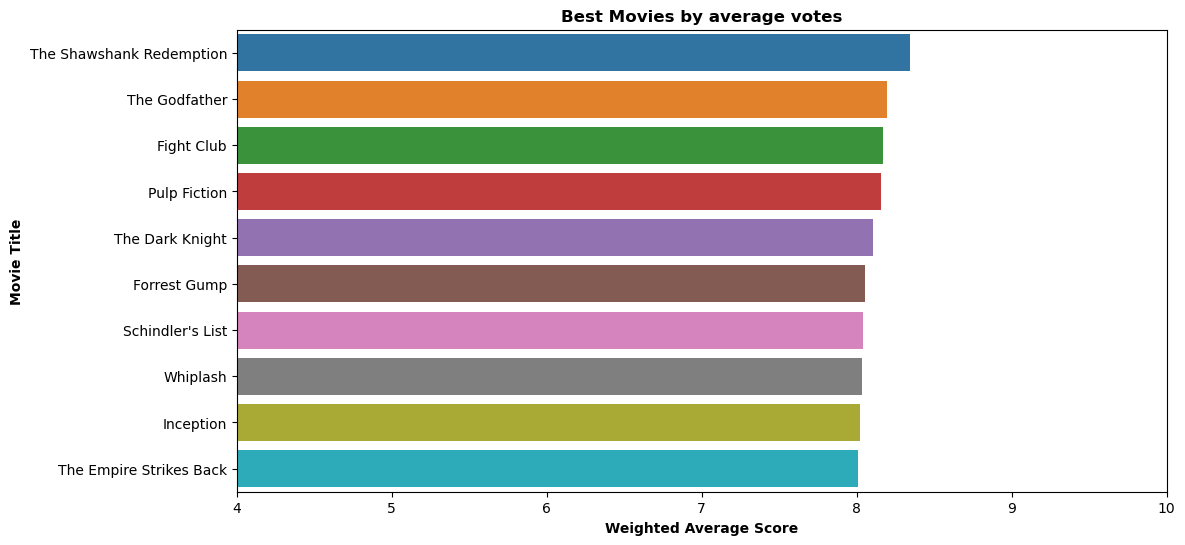

In [42]:
weighted_avg = movies_sorted_ranking.sort_values('weighted_average', ascending = False)
plt.figure(figsize = (12,6))
colors = sns.color_palette("tab10", n_colors=10)
axis1 = sns.barplot(x = weighted_avg['weighted_average'].head(10), y = weighted_avg['original_title'].head(10), palette = colors)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

                    

#### 2. RECOMMENDATION BASED ON POPULARITY OF MOVIES

In [43]:
popularity = movies_sorted_ranking.sort_values('popularity', ascending = False)
popularity.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.365286
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.998100
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.334360


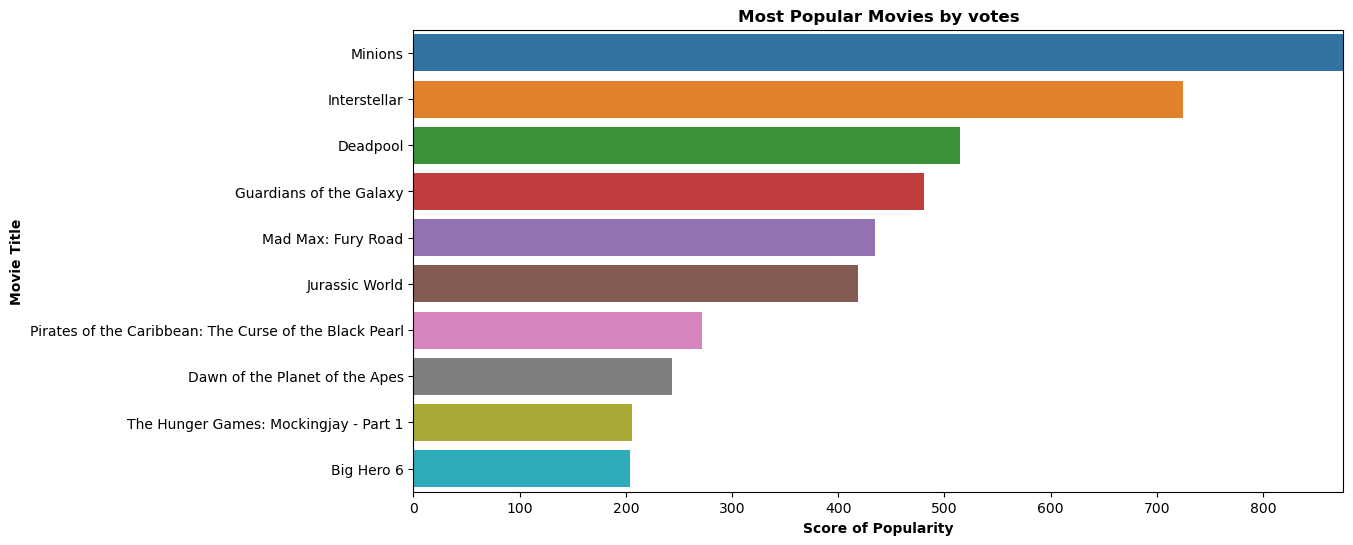

In [44]:
popularity = movies_sorted_ranking.sort_values('popularity', ascending = False)
plt.figure(figsize = (12,6))
colors = sns.color_palette("tab10", n_colors=10)
axis1 = sns.barplot(x = popularity['popularity'].head(10), y = popularity['original_title'].head(10), data = popularity, palette = colors)
plt.xlim(0, popularity['popularity'].max())
plt.title('Most Popular Movies by votes', weight = 'bold')
plt.xlabel('Score of Popularity', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

##### HENCE, WE GIVE 50% PRIORITY TO BOTH RECOMMENDATIONS BASED ON SCALED WEIGHTED AVERAGE AND POPULARITY SCORE.

##### 3. RECOMMENDATION BASED ON SCORE WHERE WE GIVE 50% PRIORITY TO EACH WEIGHTED AVERAGE AND POPULARITY

In [45]:
### MIN_MAX_SCALING OF THE COLUMNS DUE TO THEIR DIFFERENT MAGNITUDE OF VALUES
scaled = MinMaxScaler()
movies_scaled_df = scaled.fit_transform(movies_cleaned_df[['weighted_average', 'popularity']])
movies_normalized_df = pd.DataFrame(movies_scaled_df, columns = ['weighted_average', 'popularity'])
movies_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [46]:
movies_cleaned_df[['normalized_weight_average', 'normalized_popularity']] = movies_normalized_df
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013,0.674339,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627,0.581403,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276075,0.436273,0.122635


In [47]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending = False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


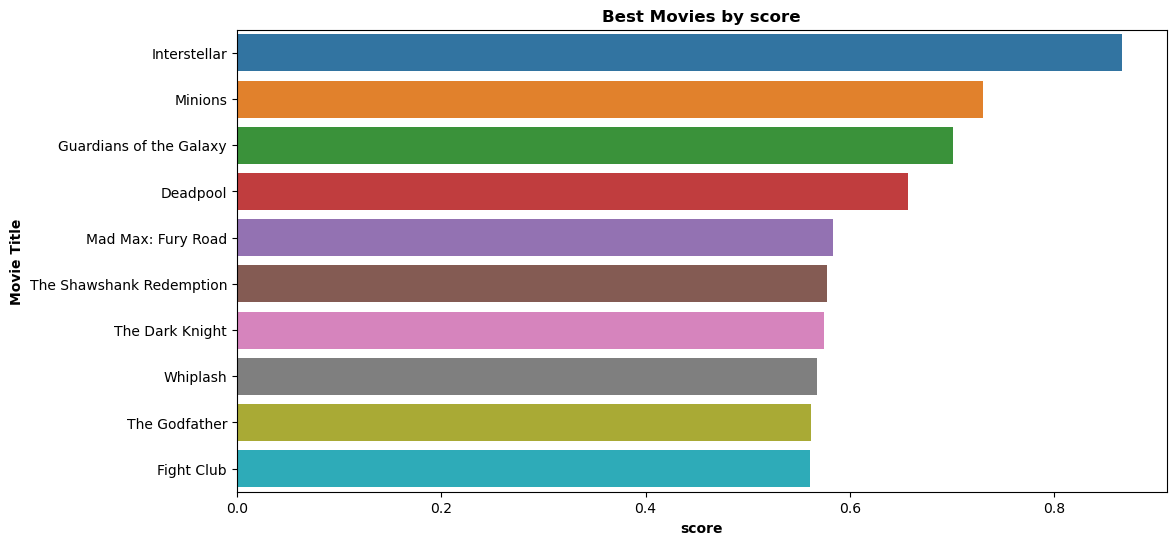

In [48]:
scored_df = movies_cleaned_df.sort_values('score', ascending = False)
plt.figure(figsize = (12,6))
colors = sns.color_palette("tab10", n_colors=10)
axis1 = sns.barplot(x = scored_df['score'].head(10), y = scored_df['original_title'].head(10), data = scored_df, palette = colors)
#plt.xlim(0, popularity['popularity'].max())
plt.title('Best Movies by score', weight = 'bold')
plt.xlabel('score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

#### 4. CONTENT_BASED RECOMMENDATION SYSTEM

In [49]:
movies_cleaned_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [50]:
tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode', analyzer = 'word', token_pattern = '\w{1,}',
                      ngram_range = (1, 3), stop_words = 'english')
movies_cleaned_df ['overview'] = movies_cleaned_df['overview'].fillna('')

In [51]:
tfd_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [52]:
tfd_matrix.shape

(4803, 10417)

In [53]:
tfd_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [54]:
sig = sigmoid_kernel(tfd_matrix, tfd_matrix)
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [55]:
indices = pd.Series(movies_cleaned_df.index, index = movies_cleaned_df['original_title']).drop_duplicates()
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [56]:
indices['Newlyweds']

4799

In [57]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [58]:
list(enumerate(sig[indices['Newlyweds']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615943791623508),
 (3, 0.7615945564232902),
 (4, 0.7615945779342556),
 (5, 0.7615943267971559),
 (6, 0.7615948190414071),
 (7, 0.761594346971664),
 (8, 0.7615943903358866),
 (9, 0.761594688255891),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615943548130525),
 (17, 0.761594965420998),
 (18, 0.7615942819944952),
 (19, 0.7615945082445131),
 (20, 0.7615942928381602),
 (21, 0.7615949832832596),
 (22, 0.7615941559557649),
 (23, 0.761594428370306),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615944537585686),
 (28, 0.7615941559557649),
 (29, 0.7615943053510925),
 (30, 0.7615943361754078),
 (31, 0.76159445046522),
 (32, 0.7615941559557649),
 (33, 0.7615944286938301),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761594394

In [59]:
sorted(list(enumerate(sig[indices['Newlyweds']])), key = lambda x: x[1], reverse = True)

[(4799, 0.7616344692549826),
 (616, 0.7616048159533783),
 (2689, 0.7616040118828756),
 (869, 0.7616023446645636),
 (3969, 0.7615999241031715),
 (1576, 0.761599897054374),
 (2290, 0.7615997916001525),
 (1032, 0.7615997293504287),
 (3145, 0.7615995818321376),
 (2531, 0.7615992277356394),
 (504, 0.7615991572658852),
 (866, 0.7615986885689172),
 (1157, 0.7615985018709569),
 (2962, 0.7615983449381306),
 (242, 0.7615982589231822),
 (4576, 0.761598216183433),
 (1223, 0.761598205140339),
 (3479, 0.7615982040456052),
 (2586, 0.7615979971714508),
 (2688, 0.7615979281286247),
 (3155, 0.7615979184287897),
 (2869, 0.7615978888434758),
 (3559, 0.7615978829960376),
 (4641, 0.7615978736478359),
 (1632, 0.7615977959513462),
 (4616, 0.7615977247067919),
 (1071, 0.7615977198249168),
 (3393, 0.7615976461979505),
 (1970, 0.7615974163030651),
 (1856, 0.7615973809810894),
 (1385, 0.7615973007946545),
 (3583, 0.7615972678262316),
 (4591, 0.7615971603170043),
 (1110, 0.761597151119841),
 (237, 0.76159707908666

In [60]:
def give_rec(title, sig = sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movie_indices = [i[0] for i in sig_scores]
    return movies_cleaned_df['original_title'].iloc[movie_indices]
   

In [61]:
give_rec('Spy Kids')

1302    Spy Kids 2: The Island of Lost Dreams
1155                  Spy Kids 3-D: Game Over
1769      Spy Kids: All the Time in the World
4044                               Go for It!
3359                              In Too Deep
1631                                 Mr. 3000
1825                Jimmy Neutron: Boy Genius
339                           The Incredibles
3793                     The Velocity of Gary
1081                       Revolutionary Road
Name: original_title, dtype: object

In [62]:
give_rec('Avatar')

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
942                 The Book of Life
Name: original_title, dtype: object